In [65]:
## imports:
# básicos
import os
import numpy as np
# data
import pandas as pd
import sklearn as sk
# plots
from matplotlib import pyplot as plt
from matplotlib import colors
# stylish plots (comentar caso não tenha LaTeX)
from matplotlib import rc
plt.style.use('bmh')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [218]:
# some functions
def cute_hist(x, bins=10, title='Histogram',
              xlabel='Data', ylabel='Frequency',
              cmap='viridis',
              func=lambda a, b: (a/b)**2, df=False):
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=18)
    if not df:
        n, bin_array, patches = plt.hist(x, bins)
    else:
        ax = x.plot(kind='bar')
        n = x.to_numpy()
        patches = ax.patches
    fracs = func(n, n.max())
    norm = colors.Normalize(0, 1)
    cm = plt.cm.get_cmap(name=cmap)
    for frac, patch in zip(fracs, patches):
        color = cm(norm(frac))
        patch.set_facecolor(color)
    plt.show()

In [150]:
data_csv = os.getcwd() + "/train_data.csv" # os.getcwd() gets the current directory $(pwd)
features=["ID", "Age", "Workclass", "fnlwgt", "Education",
    "Education Number", "Marital Status", "Occupation",
    "Relationship", "Race", "Sex", "Capital Gain",
    "Capital Loss", "Hours per week", "Country",
    "Income"]
a = pd.read_csv(data_csv, names=features,
    sep=',', engine='python', na_values='?',
    header=0)

In [154]:
a.shape

(32560, 16)

In [153]:
adult_brute.head(5)

,ID,Age,Workclass,fnlwgt,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [155]:
a["Country"].value_counts()

United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

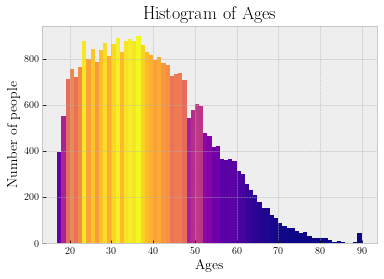

In [242]:
cute_hist(x=a['Age'], bins=(a['Age'].max() - a['Age'].min()),
          title='Histogram of Ages', cmap='plasma',
          xlabel='Ages', ylabel='Number of people')

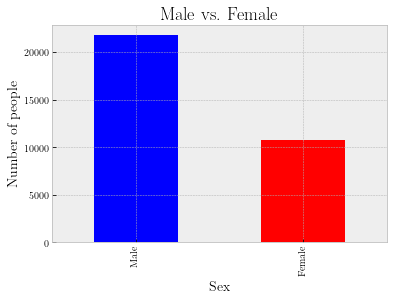

In [247]:
cute_hist(x=a['Sex'].value_counts(), bins=2,
          title='Male vs. Female', cmap='bwr',
          xlabel='Sex', ylabel='Number of people',
          func=lambda x, xmax: (x/xmax < 1/2), df=True)

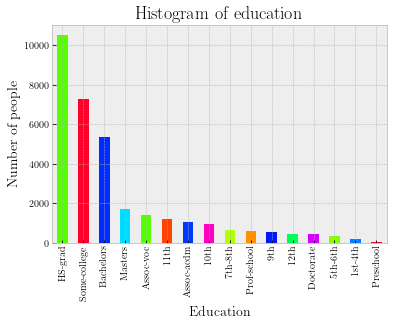

In [250]:
cute_hist(a['Education'].value_counts(), title='Histogram of education',
          xlabel='Education', ylabel='Number of people',
          cmap='gist_rainbow', df=True,
          func=lambda a,b: np.array([np.random.uniform() for i in a]))